In [ ]:
#ChristinaLoniewski
#This take 1 event, and print 1-4 pmt arrays, depending on input (top,bottom,zoomed in, zoomed out)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as clrs
import numpy as np
import pylab
import matplotlib as mpl
pylab.rcParams['figure.figsize']=10,10


In [2]:
def FindMeanSumofPhotons_binom(filename, qm_efficiency):
    
#Apply binomial 
#Print sum of photons for each event. Print the mean and standard deviation of these sums.
    print("binomial applied\nquantum efficiency is ", qm_efficiency)
    pmt_array = np.genfromtxt(filename,delimiter=',')
    binom_array = np.zeros(shape=(np.shape(pmt_array)[0],np.shape(pmt_array)[1]))
    for i in range (0,np.shape(pmt_array)[0]):
        for j in range(0,np.shape(pmt_array)[1]): 
            y = pmt_array[i][j]
            x = np.random.binomial(y,qm_efficiency)
            binom_array[i][j]=x
    #all    
    totalphotonsforeachevent_qm = np.sum(binom_array[:,:-1],axis=1)
    mean_qm=np.mean(totalphotonsforeachevent_qm) #Some% probability detected
    stddev_qm=np.std(totalphotonsforeachevent_qm)
    print("all:\t\t",round(mean_qm,2),"+/-",round(stddev_qm,2))
    #top
    totalphotonsforeachevent_qm = np.sum(binom_array[:,:253],axis=1)
    mean_qm_top=np.mean(totalphotonsforeachevent_qm) #30% probability detected
    stddev_qm_top=np.std(totalphotonsforeachevent_qm)
    print("top array:\t",round(mean_qm_top,2),"+/-",round(stddev_qm_top,2))  
        #Max pmt
    biggestpmtpereventfortop = np.amax(pmt_array[:,:253],axis=1)
    maxPmtOverTopArrayPerEvent = np.divide(biggestpmtpereventfortop,totalphotonsforeachevent_qm)
    mean_maxPmtFraction=np.mean(maxPmtOverTopArrayPerEvent)
    
    print("fraction of max PMT photons over total photons in top array is ",mean_maxPmtFraction)
    #bottom
    pmt_array_bottom = np.genfromtxt(filename,delimiter=',')
    totalphotonsforeachevent_qm = np.sum(binom_array[:,300:-1],axis=1)
    mean_qm_bottom=np.mean(totalphotonsforeachevent_qm) #30% probability detected
    stddev_qm_bottom=np.std(totalphotonsforeachevent_qm)
    print("bottom array:\t",round(mean_qm_bottom,2),"+/- ",round(stddev_qm_bottom,2)) 
    print("\n")
    return mean_qm,stddev_qm

In [3]:
#filename='/home/christina/LZSim/bin_files/Random/20180228_ElectronUnderLiquidSurface_Random_1000events_z1456mm_photocathode_2036517217_pmt_phot.csv'
filename='/home/christina/LZSim/bin_files/NumberLiquidElectrons/20171205_1liquidelectron_Random_10000events_z145p6cm_543696148.csv'
#filename='/home/christina/LZSim/bin_files/20171001_ElectronUnderLiquidSurface_Bet3Pmts_1000events_z146cm_1813619475.csv'
#filename='/home/christina/LZSim/bin_files/Center/20180228_ElectronUnderLiquidSurface_Center_1000events_photocathode_1456mm_60471645_pmt_phot.csv'
##filename='/home/christina/LZSim/bin_files/Random/20180228_ElectronUnderLiquidSurface_Random_1000events_z1456mm_photocathode_2036517217_pmt_phot.csv'
##filename='/home/christina/LZSim/bin_files/Rings_equalarea/20171115_Ring26_51cm_52cm_Random_10000events_z145p6cm954436014.csv'
##filename='/home/christina/LZSim/bin_files/Rings_equalarea/20171113_Ring49_70cm_70p7cm_Random_10000events_z145p6cm1259312009_phot.csv'
##filename='/home/christina/LZSim/bin_files/20171115_Ring25_50cm_51cm_Random_10000events_z145p6cm433973049_phot.csv'
#filename='/home/christina/LZSim/bin_files/20180707_Ring49_70cm_70p7cm_Random_10000events_z145p6cm365283286_phot.csv'
pmt_array=np.genfromtxt(filename, delimiter=",")
pmt_location_top = np.genfromtxt('/home/christina/LZSim/20170907_TopPMTCenterLocations.csv',delimiter=',')
pmt_location_bottom = np.genfromtxt('/home/christina/LZSim/20170907_BottomPMTCenterLocations.csv',delimiter=',')
print(np.shape(pmt_array))

(9911, 542)


In [4]:
#Possible color maps:
cmap1 = mpl.colors.ListedColormap(['midnightblue','darkcyan',
                                  'mediumturquoise','yellowgreen','yellow','orange','red'])

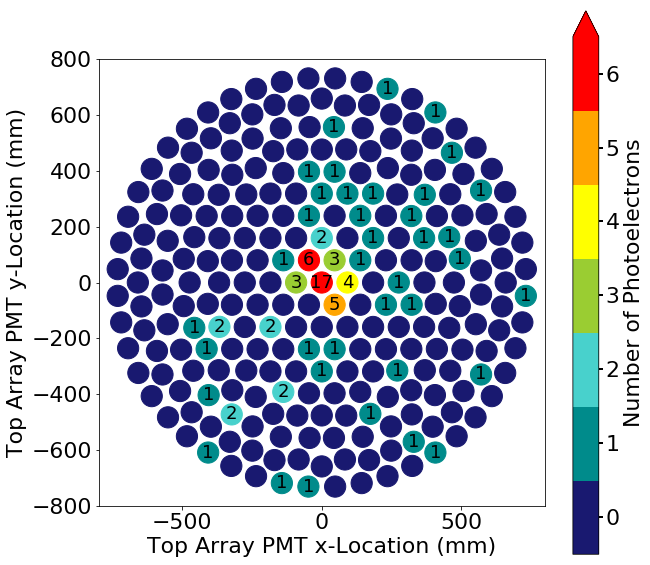

For all events:
binomial applied
quantum efficiency is  0.3


KeyboardInterrupt: 

In [5]:

event=2
qm=0.3
Ncolors = 15 # Number of labels (Number of colors)
x=pmt_location_top[:,2]; y=pmt_location_top[:,3]; M = np.shape(x)[0]; r=np.empty(M); r.fill(38)

pmtID = pmt_location_top[:,0]; pmtID_int = np.int_(pmtID); 


binom_array = np.zeros(shape=(np.shape(pmt_array)[1]))

for j in range(0,np.shape(pmt_array)[1]): 
    yy = pmt_array[event][j]
    xx = np.random.binomial(yy,qm)
    binom_array[j]=xx


PmtPhotFloat = binom_array[:253]; PmtPhotInt = np.int_(PmtPhotFloat); PmtPhotStr = np.str_(PmtPhotInt)

# setup the plot
fig = plt.figure(facecolor='white', figsize=(10, 10))
ax = fig.add_subplot(111, aspect='equal')
ax.axis([-800, 800, -800, 800])
#ax.grid(True)

tag = PmtPhotInt
# define the colormap
cmap = cmap1

# define the bins and normalize
bounds = np.linspace(0.,7,8)
norm = mpl.colors.BoundaryNorm(np.arange(-.5,7,1), cmap.N)

for pmt in range(0,M):  
    if PmtPhotInt[pmt]>=1:
        plt.text(x[pmt], y[pmt], str(PmtPhotInt[pmt]), fontsize=18,color='black',horizontalalignment='center',
            verticalalignment='center')
        

# make the scatter
scat = ax.scatter(x,y,c=tag,s=100, cmap=cmap,norm=norm)
fig.canvas.draw()
# create the colorbar
cb = plt.colorbar(scat, ticks=np.linspace(0.,7,8),extend='max')
cb.ax.tick_params(labelsize=22, width=2)
cb.set_label('Number of Photoelectrons',fontsize = 22)
plt.tick_params(axis='x', labelsize=22)
plt.tick_params(axis='y', labelsize=22)
plt.ylabel('Top Array PMT y-Location (mm)', fontsize = 22)
plt.xlabel('Top Array PMT x-Location (mm)',fontsize = 22)

# Calculate radius in pixels :
rr_pix = (ax.transData.transform(np.vstack([r, r]).T) -
          ax.transData.transform(np.vstack([np.zeros(M), np.zeros(M)]).T))
rpix, _ = rr_pix.T

# Calculate and update size in points:
size_pt = (2*rpix/fig.dpi*72)**2
scat.set_sizes(size_pt)
plt.savefig('/home/christina/LZSim/Figures/20180308_TopPMTArray_Photoelectrons.png',bbox_inches='tight')
plt.show()

#Print information about all events
print("For all events:")
FindMeanSumofPhotons_binom(filename,qm)



print("For this event:\n")
# Print information specific to this event
pmt_array_sum=np.sum(pmt_array[event,:253])
print("For this event, there are ", pmt_array_sum, "photons in the top array before any qm is applied")
binom_sum=np.sum(binom_array[:253])
print("For this event, there are ", binom_sum, "photons in the top array after binomial qm is applied")
x=round(binom_sum/pmt_array_sum*100,2)
print("This means that for this event ",x,"% of photons that hit the top array are detected")


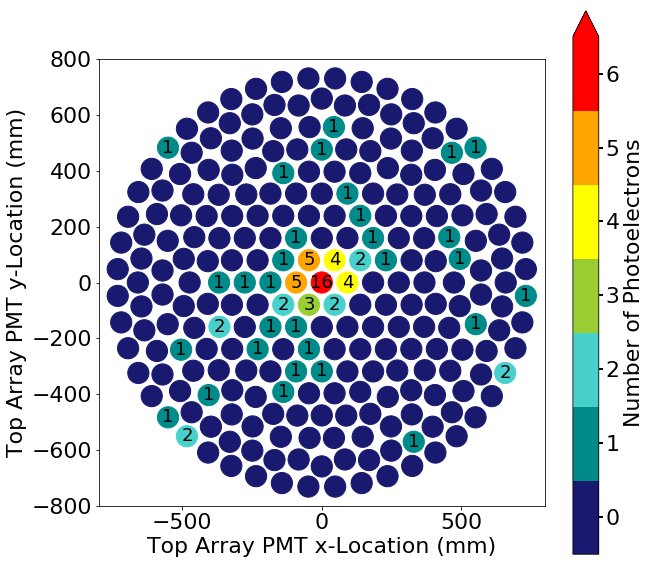

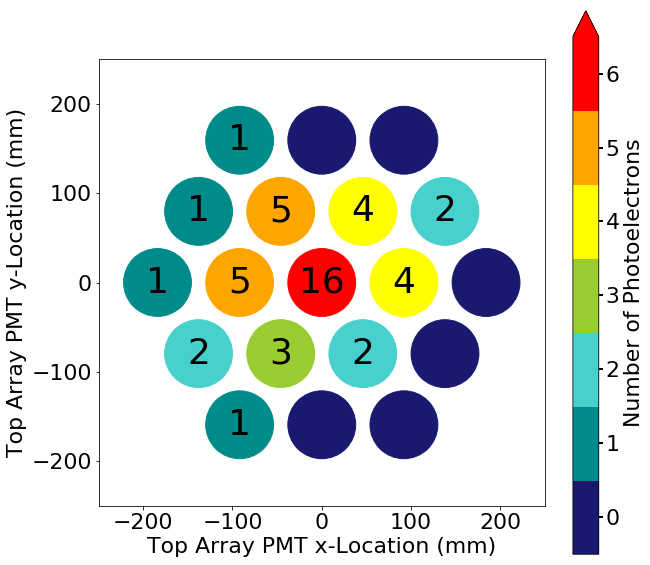

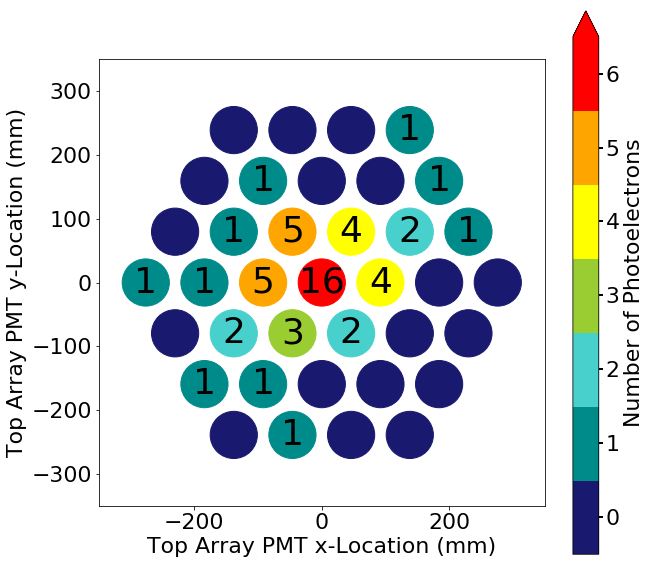

In [6]:

event=2
qm=0.3
Ncolors = 15 # Number of labels (Number of colors)
x=pmt_location_top[:,2]; y=pmt_location_top[:,3]; M = np.shape(x)[0]; r=np.empty(M); r.fill(38)

pmtID = pmt_location_top[:,0]; pmtID_int = np.int_(pmtID); 


binom_array = np.zeros(shape=(np.shape(pmt_array)[1]))

for j in range(0,np.shape(pmt_array)[1]): 
    yy = pmt_array[event][j]
    xx = np.random.binomial(yy,qm)
    binom_array[j]=xx


PmtPhotFloat = binom_array[:253]; PmtPhotInt = np.int_(PmtPhotFloat); PmtPhotStr = np.str_(PmtPhotInt)

# setup the plot
fig = plt.figure(facecolor='white', figsize=(10, 10))
ax = fig.add_subplot(111, aspect='equal')
ax.axis([-800, 800, -800, 800])
#ax.grid(True)

tag = PmtPhotInt
# define the colormap
cmap = cmap1

# define the bins and normalize
bounds = np.linspace(0.,7,8)
norm = mpl.colors.BoundaryNorm(np.arange(-.5,7,1), cmap.N)

for pmt in range(0,M):  
    if PmtPhotInt[pmt]>=1:
        plt.text(x[pmt], y[pmt], str(PmtPhotInt[pmt]), fontsize=18,color='black',horizontalalignment='center',
            verticalalignment='center')
        

# make the scatter
scat = ax.scatter(x,y,c=tag,s=100, cmap=cmap,norm=norm)
fig.canvas.draw()
# create the colorbar
cb = plt.colorbar(scat, ticks=np.linspace(0.,7,8),extend='max')
cb.ax.tick_params(labelsize=22, width=2)
cb.set_label('Number of Photoelectrons',fontsize = 22)
plt.tick_params(axis='x', labelsize=22)
plt.tick_params(axis='y', labelsize=22)
plt.ylabel('Top Array PMT y-Location (mm)', fontsize = 22)
plt.xlabel('Top Array PMT x-Location (mm)',fontsize = 22)

# Calculate radius in pixels :
rr_pix = (ax.transData.transform(np.vstack([r, r]).T) -
          ax.transData.transform(np.vstack([np.zeros(M), np.zeros(M)]).T))
rpix, _ = rr_pix.T

# Calculate and update size in points:
size_pt = (2*rpix/fig.dpi*72)**2
scat.set_sizes(size_pt)
plt.savefig('/home/christina/LZSim/Figures/test.png',bbox_inches='tight')
plt.show()

#################################################################3


x=pmt_location_top[:19,2]; y=pmt_location_top[:19,3]; M = np.shape(x)[0]; r=np.empty(M); r.fill(38)
PmtPhotFloat = binom_array[:19]; PmtPhotInt = np.int_(PmtPhotFloat); PmtPhotStr = np.str_(PmtPhotInt)

# setup the plot
fig = plt.figure(facecolor='white', figsize=(10, 10))
ax = fig.add_subplot(111, aspect='equal')
ax.axis([-250, 250, -250, 250])
#ax.grid(True)

tag = PmtPhotInt
# define the colormap
cmap = cmap1

# define the bins and normalize
bounds = np.linspace(0.,7,8)
norm = mpl.colors.BoundaryNorm(np.arange(-.5,7,1), cmap.N)

for pmt in range(0,M):  
    if PmtPhotInt[pmt]>=1:
        plt.text(x[pmt], y[pmt], str(PmtPhotInt[pmt]), fontsize=36,color='black',horizontalalignment='center',
            verticalalignment='center')
        

# make the scatter
scat = ax.scatter(x,y,c=tag,s=100, cmap=cmap,norm=norm)
fig.canvas.draw()
# create the colorbar
cb = plt.colorbar(scat, ticks=np.linspace(0.,7,8),extend='max')
cb.ax.tick_params(labelsize=22, width=2)
cb.set_label('Number of Photoelectrons',fontsize = 22)
plt.tick_params(axis='x', labelsize=22)
plt.tick_params(axis='y', labelsize=22)
plt.ylabel('Top Array PMT y-Location (mm)', fontsize = 22)
plt.xlabel('Top Array PMT x-Location (mm)',fontsize = 22)

# Calculate radius in pixels :
rr_pix = (ax.transData.transform(np.vstack([r, r]).T) -
          ax.transData.transform(np.vstack([np.zeros(M), np.zeros(M)]).T))
rpix, _ = rr_pix.T

# Calculate and update size in points:
size_pt = (2*rpix/fig.dpi*72)**2
scat.set_sizes(size_pt)
plt.savefig('/home/christina/LZSim/Figures/test.png',bbox_inches='tight')
plt.show()

###############################################3

x=pmt_location_top[:37,2]; y=pmt_location_top[:37,3]; M = np.shape(x)[0]; r=np.empty(M); r.fill(37)
PmtPhotFloat = binom_array[:37]; PmtPhotInt = np.int_(PmtPhotFloat); PmtPhotStr = np.str_(PmtPhotInt)

# setup the plot
fig = plt.figure(facecolor='white', figsize=(10, 10))
ax = fig.add_subplot(111, aspect='equal')
ax.axis([-350, 350, -350, 350])
#ax.grid(True)

tag = PmtPhotInt
# define the colormap
cmap = cmap1

# define the bins and normalize
bounds = np.linspace(0.,7,8)
norm = mpl.colors.BoundaryNorm(np.arange(-.5,7,1), cmap.N)

for pmt in range(0,M):  
    if PmtPhotInt[pmt]>=1:
        plt.text(x[pmt], y[pmt], str(PmtPhotInt[pmt]), fontsize=36,color='black',horizontalalignment='center',
            verticalalignment='center')
        

# make the scatter
scat = ax.scatter(x,y,c=tag,s=100, cmap=cmap,norm=norm)
fig.canvas.draw()
# create the colorbar
cb = plt.colorbar(scat, ticks=np.linspace(0.,7,8),extend='max')
cb.ax.tick_params(labelsize=22, width=2)
cb.set_label('Number of Photoelectrons',fontsize = 22)
plt.tick_params(axis='x', labelsize=22)
plt.tick_params(axis='y', labelsize=22)
plt.ylabel('Top Array PMT y-Location (mm)', fontsize = 22)
plt.xlabel('Top Array PMT x-Location (mm)',fontsize = 22)

# Calculate radius in pixels :
rr_pix = (ax.transData.transform(np.vstack([r, r]).T) -
          ax.transData.transform(np.vstack([np.zeros(M), np.zeros(M)]).T))
rpix, _ = rr_pix.T

# Calculate and update size in points:
size_pt = (2*rpix/fig.dpi*72)**2
scat.set_sizes(size_pt)
plt.savefig('/home/christina/LZSim/Figures/test.png',bbox_inches='tight')
plt.show()
